<a href="https://colab.research.google.com/github/robotneagu/CIS9650_TermProject/blob/main/CIS9650_Group5_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 5: Arizona Home Property Value Analysis**

![](https://imgs.search.brave.com/PecihzGlVA1zRVhMqI7PIlunjsNLSXhbPSm8G4EOoC4/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTU3/NjQ1MTc1L2ZyL3Bo/b3RvL3hlcmlzY2Fw/ZWQtbWFpc29uLWR1/LXN1ZC1vdWVzdC1h/bSVDMyVBOXJpY2Fp/bi5qcGc_cz02MTJ4/NjEyJnc9MCZrPTIw/JmM9M0FDZUlCNDlt/V2RZRmV3Wm1aZWd5/NXQ2OUR0V3hhV2E4/LXlqVGkxRnJNND0)

#### **Created by**: Daniel Ohebshalom, Shivani Ramdeo, Catherine Guirand, Robert Neagu

## **Overarching Question**: How have home purchasing habits changed over time in Pinal County, Arizona, and what drives property values across different types and locations?


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data Exploration**

In [ ]:
#Load the CSV file into a DataFrame
df = pd.read_csv("./AZ.csv")
df.head()

,state,property_zip5,property_street_address,property_city,property_county,property_id,sale_datetime,property_type,sale_price,seller_1_name,...,land_assessed_date,seller_1_state,seller_2_state,buyer_1_state,buyer_2_state,total_assessed_value,total_appraised_value,land_appraised_value,building_appraised_value,land_type
0,AZ,85143.0,1 E CORAL BEAN DR,SAN TAN VALLEY,PINAL,210572230,2021-04-20 00:00:00,RESIDENTIAL,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZ,85143.0,1 E PEPPERGRASS PL,SAN TAN VALLEY,PINAL,210571490,2020-09-16 00:00:00,RESIDENTIAL,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AZ,85173.0,1 N MESQUITE DR,SUPERIOR,PINAL,10526004A,2021-02-25 00:00:00,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZ,85143.0,1 W CANYON ROCK RD,SAN TAN VALLEY,PINAL,210702840,2011-09-01 00:00:00,RESIDENTIAL,90000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,85143.0,1 W MILL REEF DR,SAN TAN VALLEY,PINAL,210591110,2009-08-14 00:00:00,RESIDENTIAL,65000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the shape: number of rows and columns
print("Number of rows and columns:", df.shape)

# See all column names
print("\nColumn names:")
print(df.columns.tolist())

# Basic info about data types and missing values
print("\nData info:")
df.info()

# Quick summary of numeric columns (including sale_price)
print("\nBasic statistics for numeric columns:")
df.describe()

Number of rows and columns: (215924, 45)

Column names:
['state', 'property_zip5', 'property_street_address', 'property_city', 'property_county', 'property_id', 'sale_datetime', 'property_type', 'sale_price', 'seller_1_name', 'buyer_1_name', 'building_num_units', 'building_year_built', 'source_url', 'book', 'page', 'transfer_deed_type', 'property_township', 'property_lat', 'property_lon', 'sale_id', 'deed_date', 'building_num_stories', 'building_num_beds', 'building_num_baths', 'building_area_sqft', 'building_assessed_value', 'building_assessed_date', 'land_area_acres', 'land_area_sqft', 'land_assessed_value', 'seller_2_name', 'buyer_2_name', 'land_assessed_date', 'seller_1_state', 'seller_2_state', 'buyer_1_state', 'buyer_2_state', 'total_assessed_value', 'total_appraised_value', 'land_appraised_value', 'building_appraised_value', 'land_type', 'bin_idx', 'Price (in hundred thousands)']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215924 entries, 0 to 215923
Data colum

,property_zip5,sale_price,seller_1_name,buyer_1_name,building_num_units,building_year_built,book,page,transfer_deed_type,property_township,...,seller_2_state,buyer_1_state,buyer_2_state,total_assessed_value,total_appraised_value,land_appraised_value,building_appraised_value,land_type,bin_idx,Price (in hundred thousands)
count,215922.000000,2.159240e+05,0.0,0.0,0.0,172790.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215924.000000,215924.000000
mean,85168.926793,9.210849e+05,NaN,NaN,NaN,2001.199774,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.604856,2.604856
std,134.612912,3.943896e+06,NaN,NaN,NaN,16.384505,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.381298,2.381298
min,85118.000000,-6.880000e+04,NaN,NaN,NaN,1843.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,85123.000000,0.000000e+00,NaN,NaN,NaN,1998.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
50%,85138.000000,1.040000e+05,NaN,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
75%,85142.000000,2.750000e+05,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000
max,85739.000000,9.000000e+07,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,10.000000


## **Data Cleaning**

In [ ]:
# To keep the original data safe, we make a copy called "clean".
clean = df.copy()

# Some datasets have duplicate column names.
# This line keeps only the first occurrence of duplicated names.
clean = clean.loc[:, ~clean.columns.duplicated()]

print("Number of columns after removing duplicated names:", clean.shape[1])

Number of columns after removing duplicated names: 45


In [ ]:
# 1. Convert sale_datetime to a real datetime type
# errors='coerce' means: if a date is bad, turn it into NaT (missing datetime)
clean["sale_datetime"] = pd.to_datetime(clean["sale_datetime"], errors="coerce")

# 2. Convert property_zip5 from float to integer-like string (ZIP codes shouldn't have decimals)
# First convert to pandas "Int64" (allows missing), then to string
clean["property_zip5"] = clean["property_zip5"].astype("Int64").astype("string")

# 3. Fill missing property_type with "Unknown"
clean["property_type"] = clean["property_type"].fillna("Unknown")

# 4. Drop columns that are completely empty (100% missing values)
empty_cols = clean.columns[clean.isna().mean() == 1.0]
print("Columns that are 100% empty and will be dropped:")
print(empty_cols.tolist())
print(f"Total empty columns dropped: {len(empty_cols)}")

clean = clean.drop(columns=empty_cols)

print("\nShape after dropping empty columns:", clean.shape)

# 5. Remove rows where sale_price is missing or not positive
before_rows = clean.shape[0]
clean = clean[clean["sale_price"] > 0]
after_rows = clean.shape[0]

print(f"\nRows before filtering sale_price <= 0: {before_rows}")
print(f"Rows after keeping sale_price > 0: {after_rows}")


Columns that are 100% empty and will be dropped:
['seller_1_name', 'buyer_1_name', 'building_num_units', 'book', 'page', 'transfer_deed_type', 'property_township', 'property_lat', 'property_lon', 'sale_id', 'deed_date', 'building_num_beds', 'building_num_baths', 'building_assessed_value', 'building_assessed_date', 'land_assessed_value', 'seller_2_name', 'buyer_2_name', 'land_assessed_date', 'seller_1_state', 'seller_2_state', 'buyer_1_state', 'buyer_2_state', 'total_assessed_value', 'total_appraised_value', 'land_appraised_value', 'building_appraised_value', 'land_type']
Total empty columns dropped: 28

Shape after dropping empty columns: (215924, 17)

Rows before filtering sale_price <= 0: 215924
Rows after keeping sale_price > 0: 136578


In [ ]:
# Check how many missing values are left in each column
missing_counts = clean.isna().sum().sort_values(ascending=False)
missing_counts

,0
building_num_stories,38621
building_area_sqft,38445
building_year_built,28141
land_area_sqft,15027
land_area_acres,15027
property_zip5,1
state,0
property_city,0
property_street_address,0
sale_price,0


## **Exploratory Data Analysis**

### 1. What does the distribution of sale prices look like across all properties?

In [ ]:
# Look at basic statistics for sale_price AFTER cleaning
clean["sale_price"].describe()

,sale_price
count,1.365780e+05
mean,1.456196e+06
std,4.879707e+06
min,1.000000e+00
25%,1.250000e+05
50%,2.299000e+05
75%,3.800000e+05
max,9.000000e+07


In [ ]:
# Price bins by property type

#Price intervals
bins = np.array([0, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 2000000, 5000000])
clean['bin_idx'] = np.digitize(clean['sale_price'], bins)

clean.groupby(['property_type', 'bin_idx']).size().unstack(fill_value=0)

bin_idx,1,2,3,4,5,6,7,8,9,10
property_type,,,,,,,,,,
COMMERCIAL,530,388,241,167,128,198,115,198,208,101
CONDO,369,168,21,0,0,8,0,2,1,1
DUPLEX,117,89,52,17,4,6,2,1,0,0
MOBILE HOME,6238,1992,753,284,58,43,11,8,3,6
MULTIPLE UNIT,0,2,0,1,2,1,0,3,0,1
RESIDENTIAL,11370,26828,27789,15851,8109,3954,684,368,158,133
TOWNHOUSE,76,154,188,55,13,6,88,1,0,15
TRIPLEX,19,12,13,8,6,2,0,0,0,0
Unknown,8927,1030,643,728,601,963,621,1962,2642,10023


In [ ]:
#Increase resolution of graphs
plt.rcParams['figure.dpi'] = 900

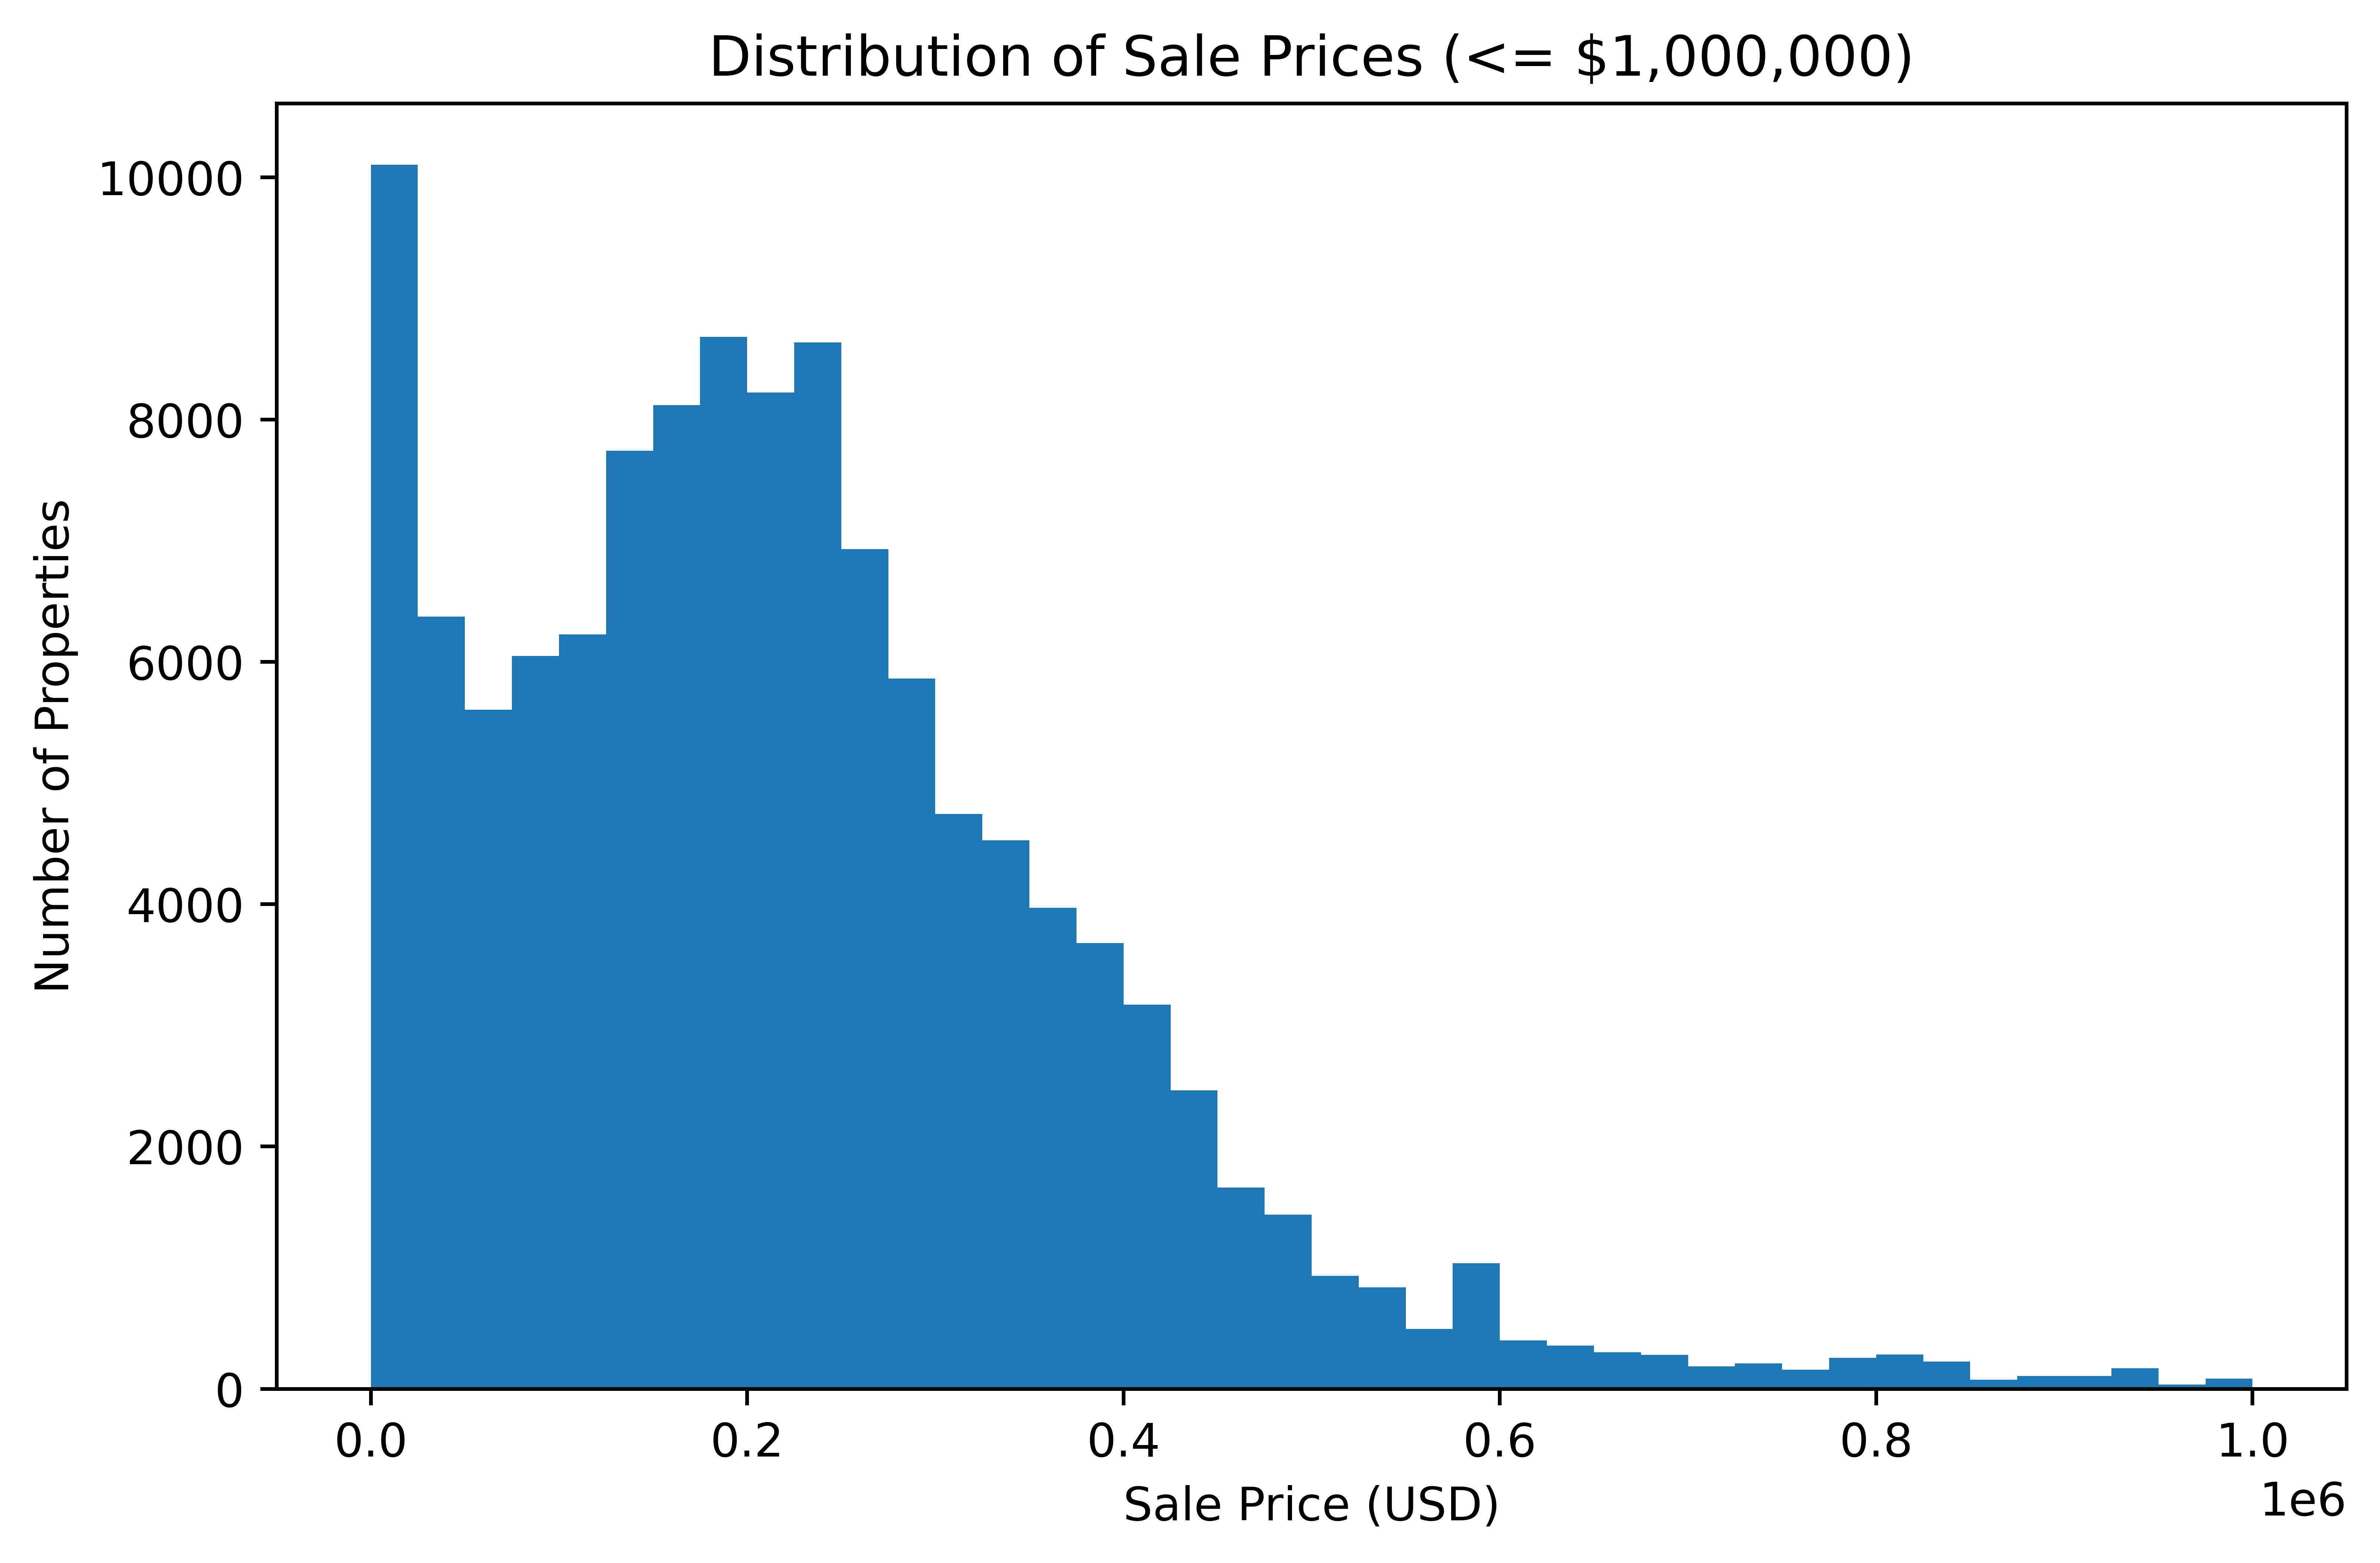

In [ ]:
# Make a copy for plotting, focusing on sale_price <= 1,000,000
price_subset = clean[clean["sale_price"] <= 1_000_000]

plt.figure(figsize=(8, 5))
plt.hist(price_subset["sale_price"], bins=40)
plt.title("Distribution of Sale Prices (<= $1,000,000)")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Number of Properties")
plt.show()

### 2. Which property types are most common in the dataset?

In [ ]:
# Count how many rows we have for each property_type
property_type_counts = clean["property_type"].value_counts()

# Show the top 10
property_type_counts.head(10)

,count
property_type,
RESIDENTIAL,95244
Unknown,28140
MOBILE HOME,9396
COMMERCIAL,2274
TOWNHOUSE,596
CONDO,570
DUPLEX,288
TRIPLEX,60
MULTIPLE UNIT,10


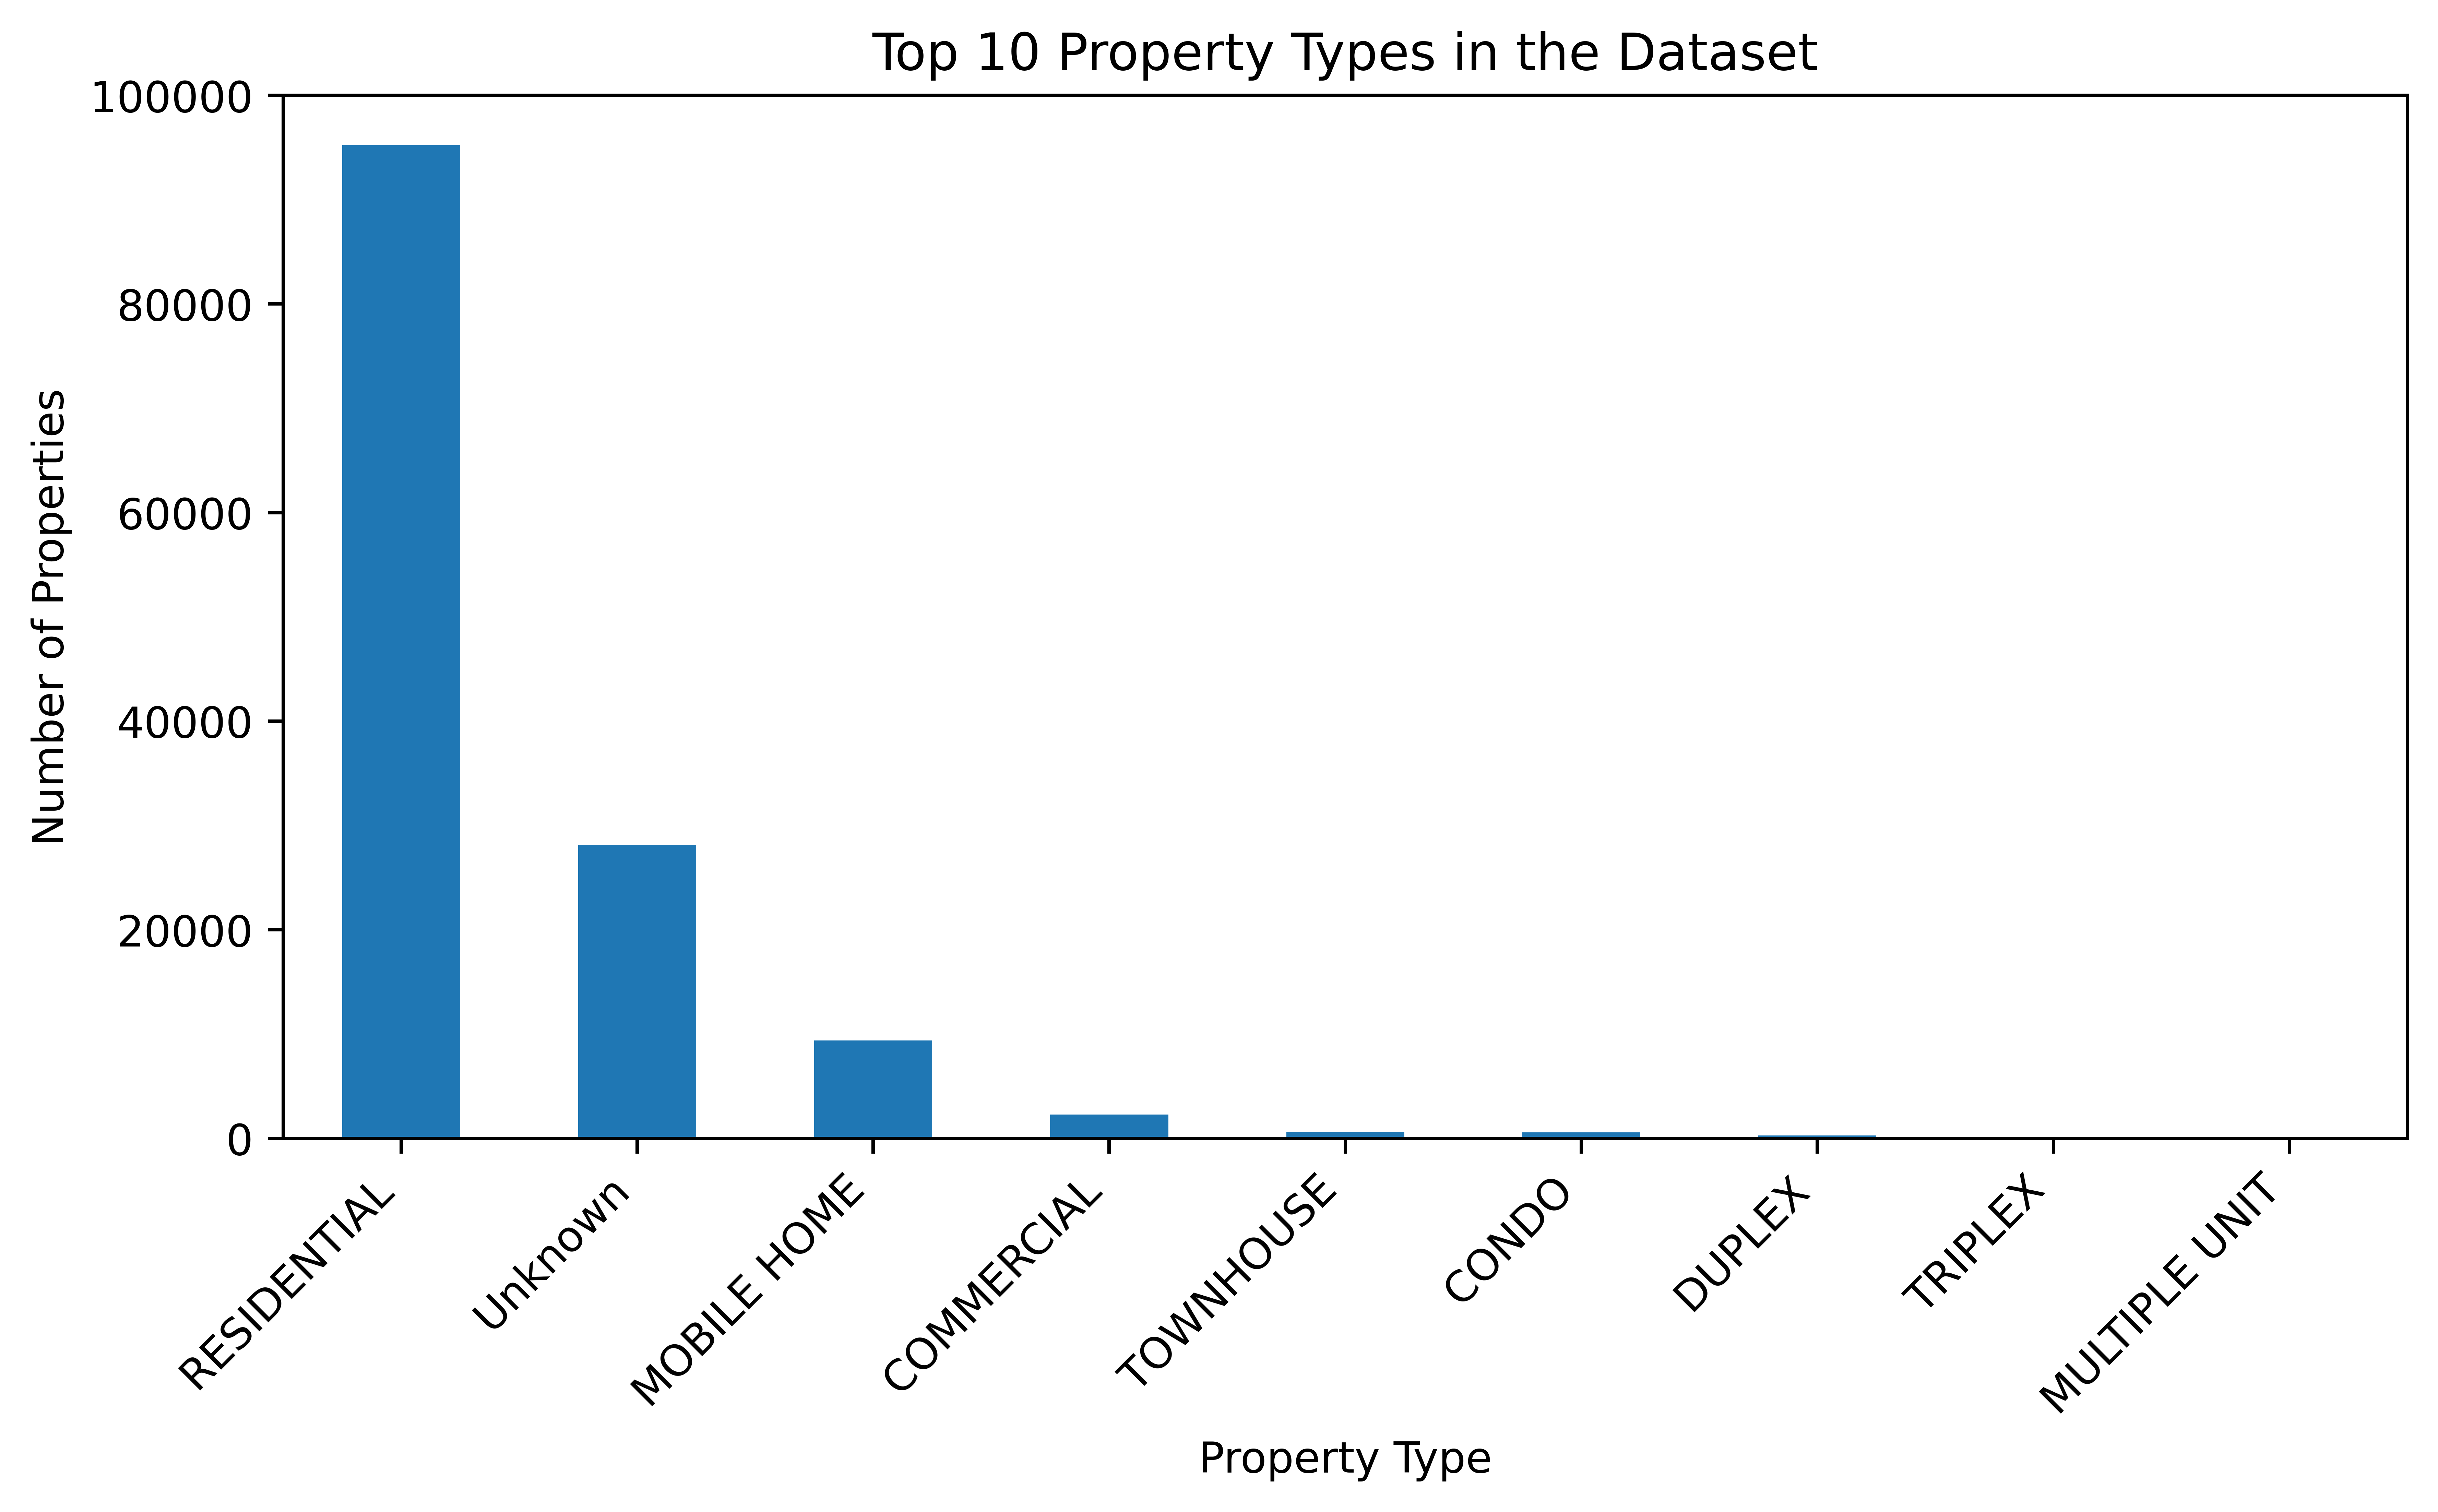

In [ ]:
# Get the top 10 property types
top_types = property_type_counts.head(10)

plt.figure(figsize=(8, 5))
top_types.plot(kind="bar")
plt.title("Top 10 Property Types in the Dataset")
plt.xlabel("Property Type")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 3. How do average sale prices vary across ZIP codes?

In [ ]:
# Group the data by ZIP code and calculate the average sale price for each ZIP
avg_price_by_zip = (
    clean.groupby("property_zip5")["sale_price"]
    .mean()
    .sort_values(ascending=False)
)

# Show the top 10 most expensive ZIP codes
avg_price_by_zip.head(10)

,sale_price
property_zip5,
85240,4.733256e+06
85142,3.298427e+06
85132,2.918737e+06
85128,2.762011e+06
85138,2.287148e+06
85139,2.070373e+06
85220,1.721194e+06
85140,1.704208e+06
85122,1.354159e+06


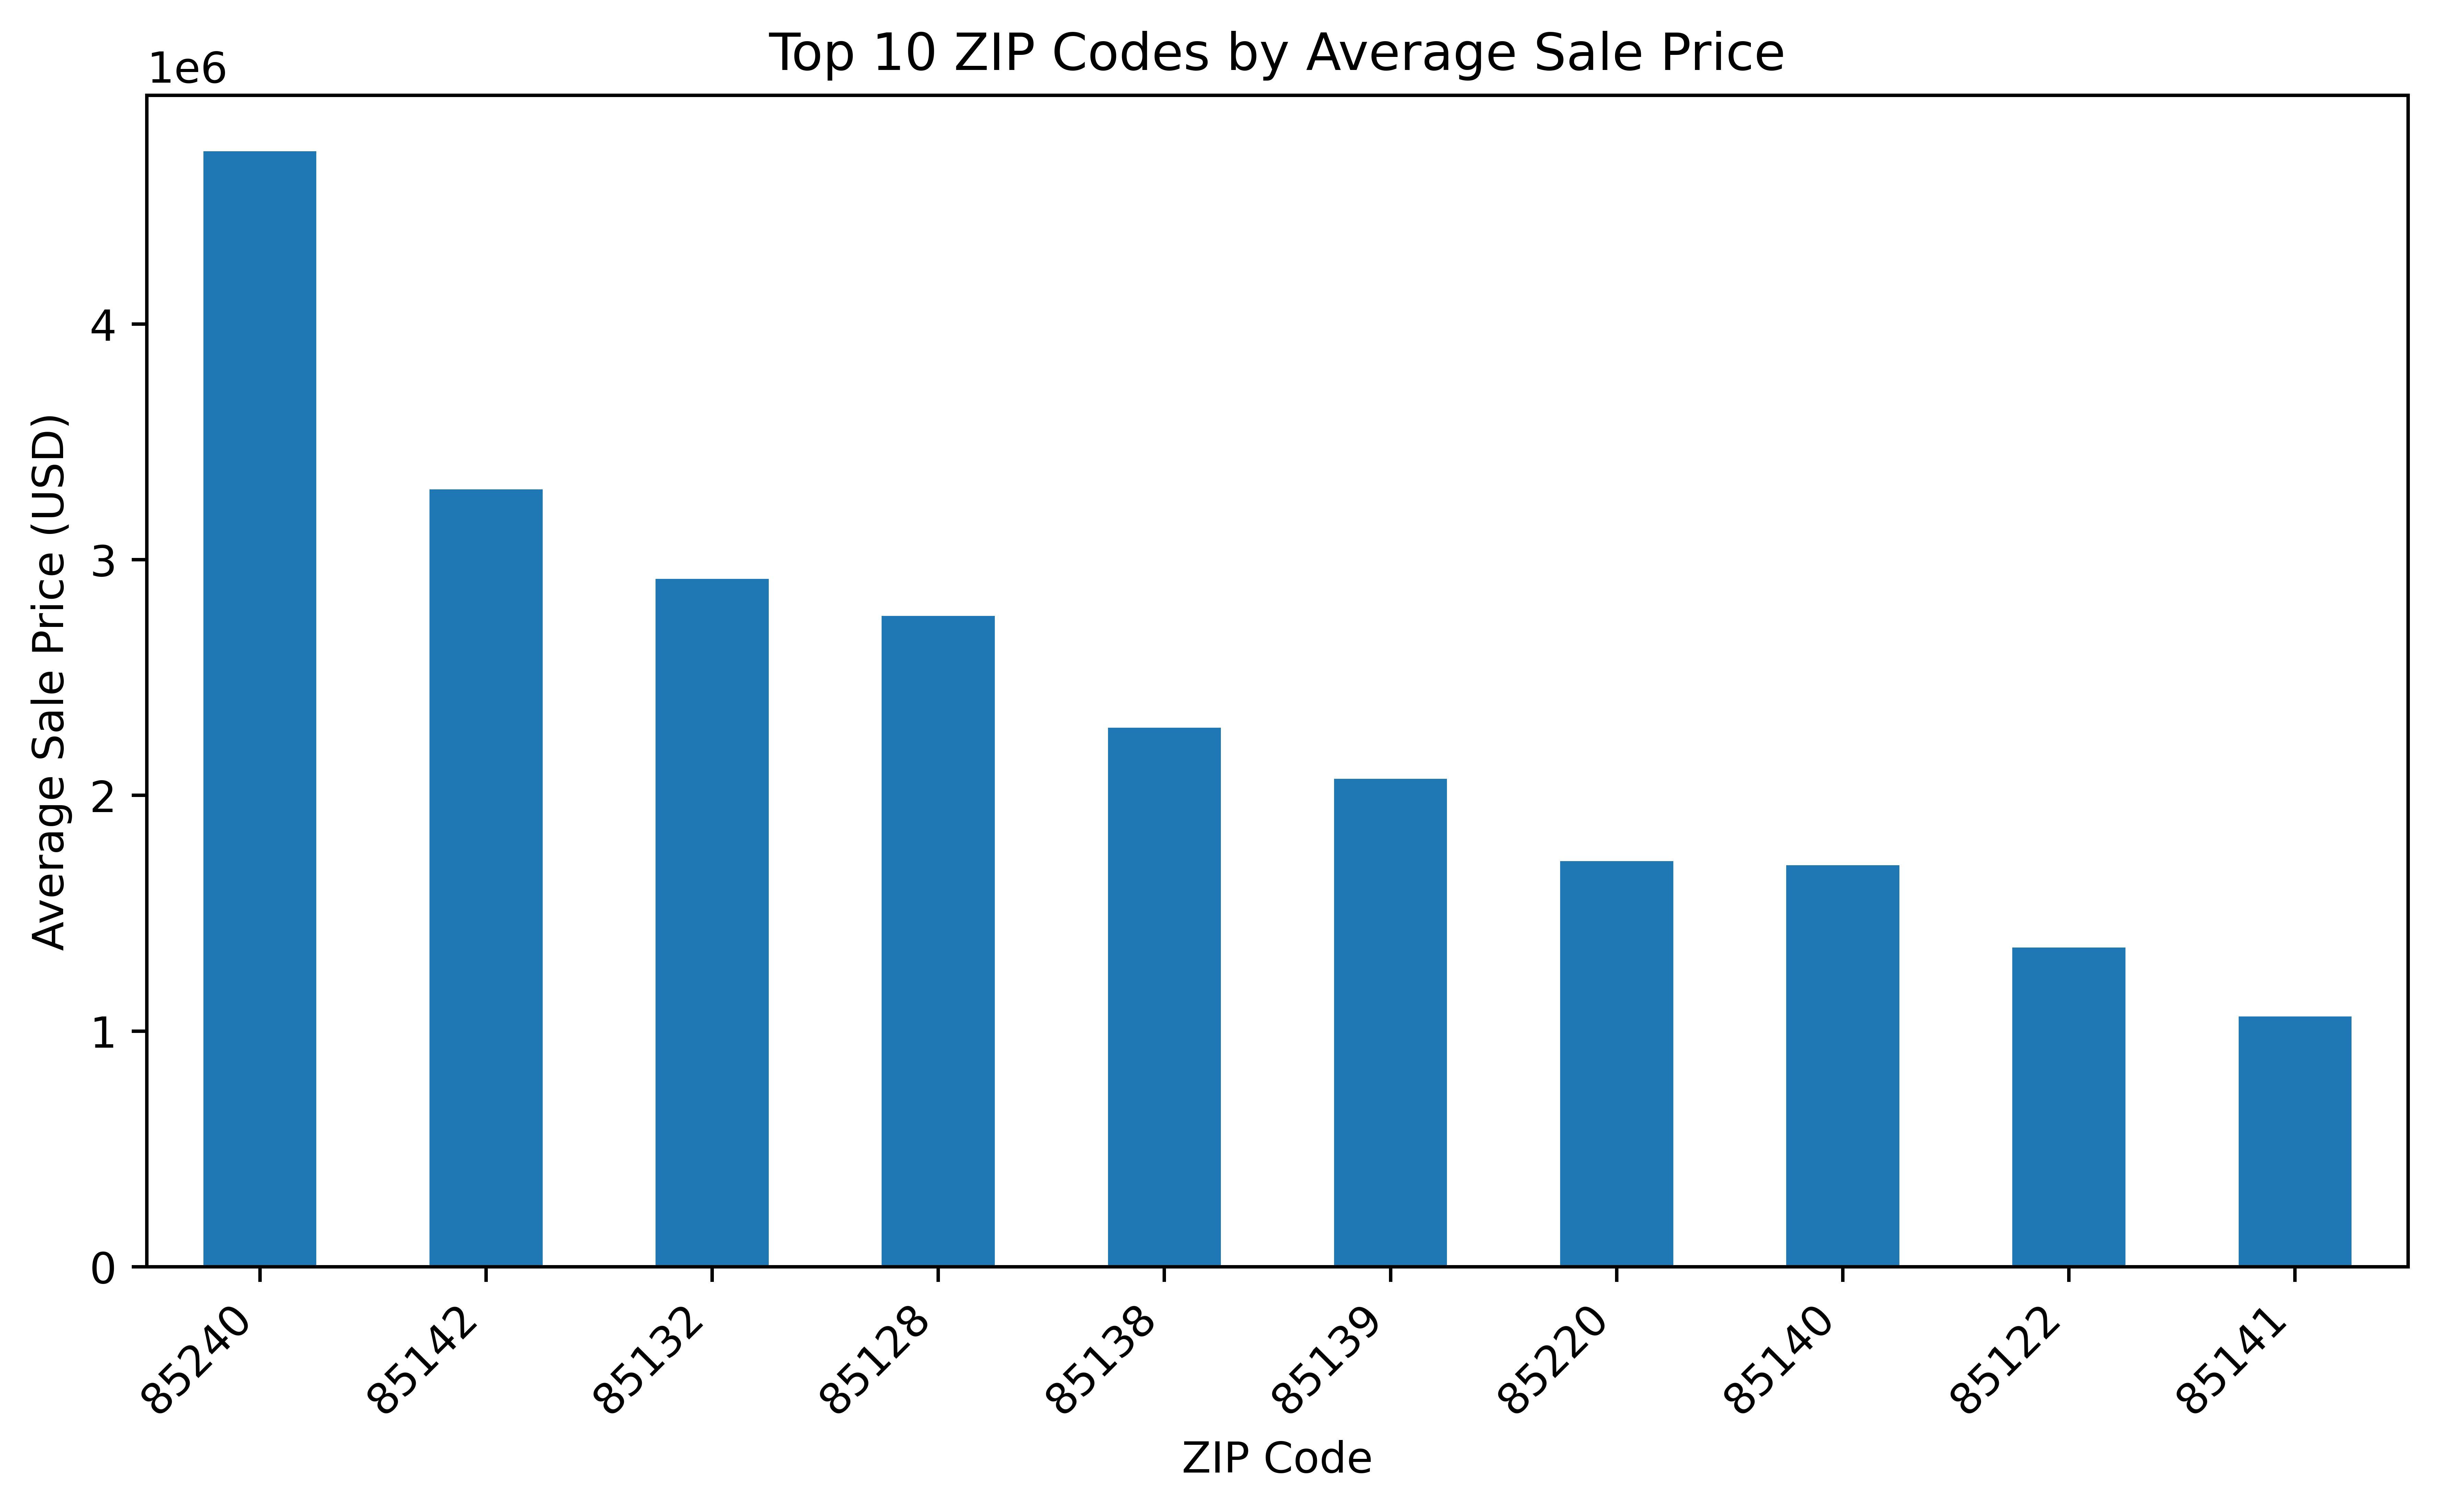

In [ ]:
# Take the top 10 ZIP codes with the highest average sale price
top10_zip = avg_price_by_zip.head(10)

plt.figure(figsize=(8, 5))
top10_zip.plot(kind="bar")
plt.title("Top 10 ZIP Codes by Average Sale Price")
plt.xlabel("ZIP Code")
plt.ylabel("Average Sale Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 4. Which property types tend to have higher or lower sale prices?

In [ ]:
# Calculate average sale price by property type
avg_price_by_type = (
    clean.groupby("property_type")["sale_price"]
    .mean()
    .sort_values(ascending=False)
)

avg_price_by_type.head(10)


,sale_price
property_type,
Unknown,5.934075e+06
MULTIPLE UNIT,1.673108e+06
COMMERCIAL,1.209016e+06
TOWNHOUSE,4.583385e+05
RESIDENTIAL,2.916009e+05
TRIPLEX,2.051980e+05
DUPLEX,1.594720e+05
CONDO,1.576814e+05
MOBILE HOME,9.993325e+04


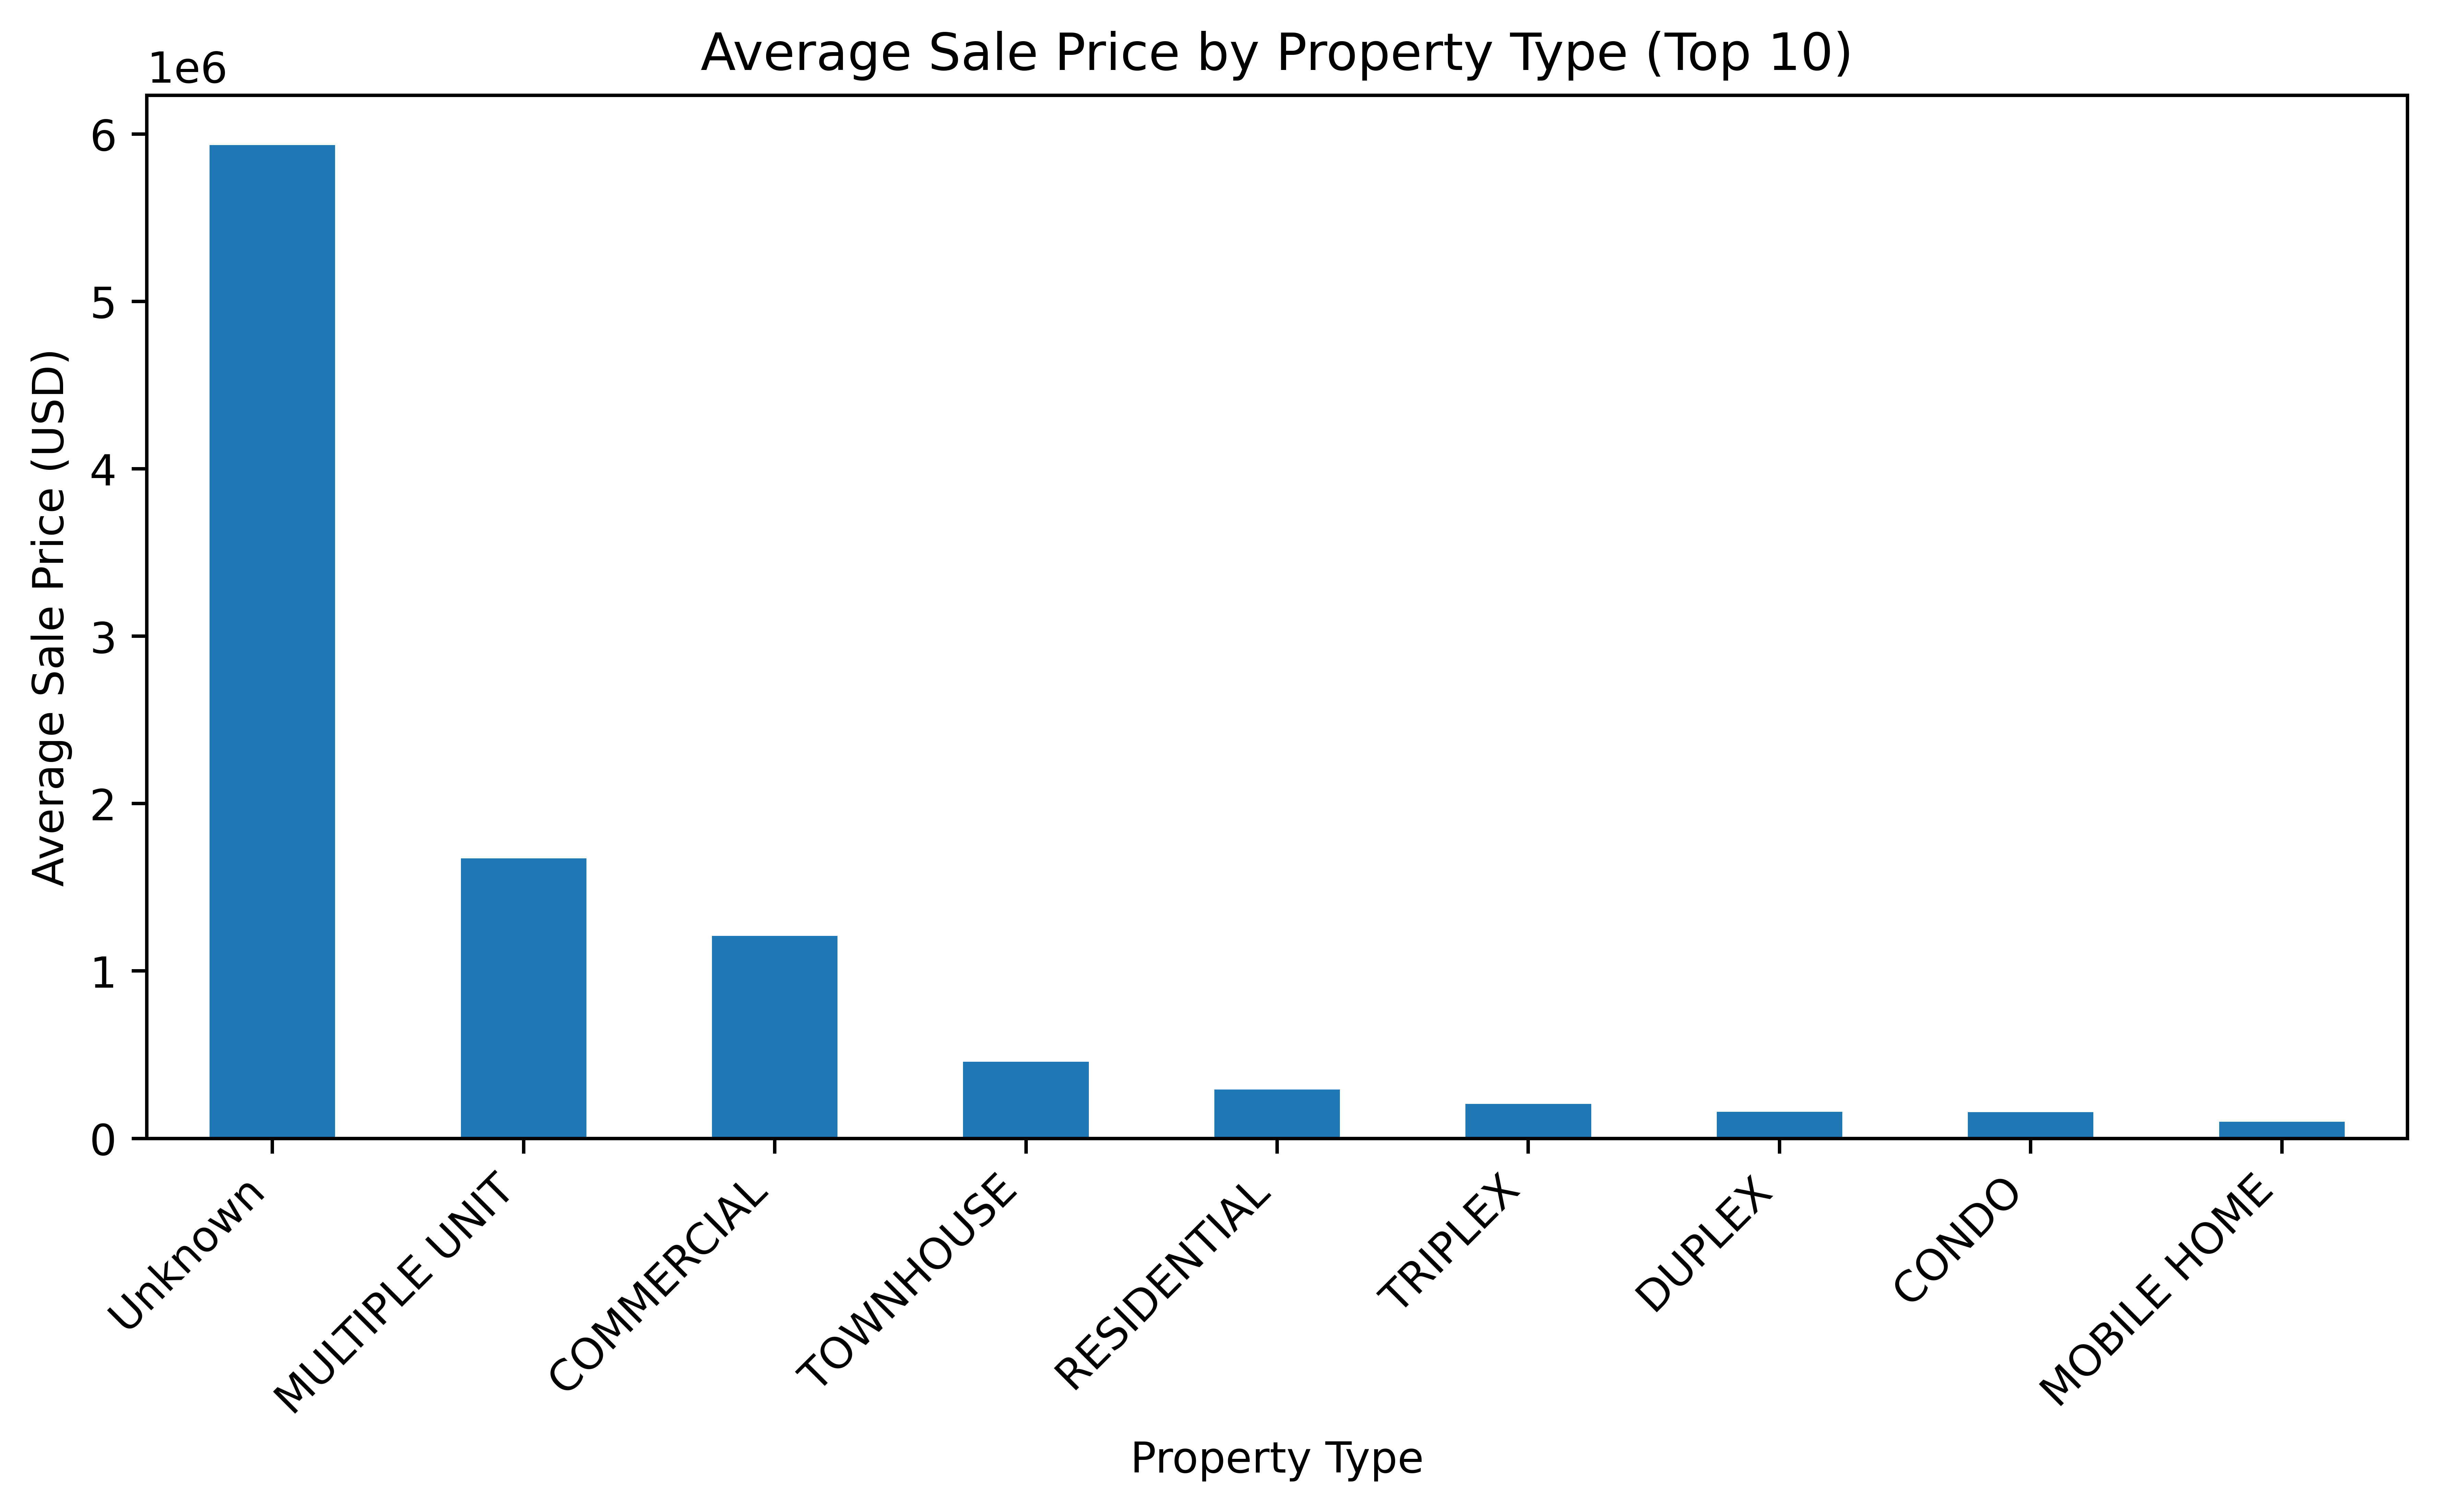

In [ ]:
#Create bar chart for average sale price by property type
plt.figure(figsize=(8, 5))
avg_price_by_type.head(10).plot(kind="bar")
plt.title("Average Sale Price by Property Type (Top 10)")
plt.xlabel("Property Type")
plt.ylabel("Average Sale Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **Conclusion and Backup**

In [ ]:
# Save the cleaned data to a new CSV file.

output_path = "/content/AZ_cleaned.csv"
# File is saved in the current working directory
clean.to_csv(output_path, index=False)

print("Cleaned data saved to:", output_path)

Cleaned data saved to: /content/AZ_cleaned.csv


## **Executive Summary**

This analysis examined Pinal County, Arizona real estate transactions to understand property value drivers and purchasing patterns. We analyzed property type distribution, geographic pricing variations, and identified key factors influencing home values in the region. Our findings reveal that both property type and location are critical value drivers, that certain neighborhoods command significantly higher average prices than others, and that specific property categories consistently sell for premium amounts. The data demonstrates clear market segmentation, revealing that specific ZIP codes and property types command significantly higher prices, which explains the variation observed across Pinal County transactions. These insights provide actionable guidance for real estate investors, developers, and market analysts seeking to understand and predict property values in Pinal County. Overall, our comprehensive data exploration successfully answered the overarching question of what drives property values across different types and locations, establishing a foundation for more sophisticated predictive modeling in future analyses.